**分散削減法（Variance Reduction Methods）** は、モンテカルロシミュレーションの精度を向上させるための手法で、シミュレーションの結果が得られるまでのサンプル数を減らすことを目指します。通常のモンテカルロ法では、精度を上げるために大量のサンプルを生成する必要がありますが、分散削減法を使うことで、少ないサンプル数でも結果の精度を向上させることができます。これにより、計算コストを削減しつつ、より効度高いシミュレーション結果を得ることができます。

分散削減法にはいくつかの方法がありますが、代表的なものを以下に挙げます。

# 1. 重要サンプリング（Importance Sampling）

重要サンプリングは、サンプリングの確率分布を変更し、重要な部分により多くのサンプルを割り当てることで、分散を減らす手法です。モンテカルロシミュレーションでは、従来の確率分布に従ってサンプルを生成しますが、重要サンプリングでは特定の部分空間（例えば、リスクの高い部分）を強調してサンプルを生成します。

- 手法の概要:
  - 通常の確率分布に基づいてサンプルを生成する代わりに、別の「重要な」分布を用いてサンプルを生成。
  - その後、サンプルに重みをつけて最終的な結果を算出します。この重みは、元の分布と新しい分布の比率です。

- 例: 例えば、オプションの価格付けにおいて、深いITM（In The Money）オプションに対して、適切に重み付けされたサンプルを生成し、無駄な部分を減らすことができます。

# 2. コントロール変数法（Control Variates）
コントロール変数法は、シミュレーションで使用する他の関連する確率変数（コントロール変数）の期待値を知っている場合に、サンプルの偏りを減らす方法です。この方法では、既知の期待値を持つ変数を用いて、目的の変数の値を修正し、分散を減らします。

- 手法の概要:
  - コントロール変数（期待値が既知である変数）を導入し、その変数の値とターゲット変数との関係を利用して、シミュレーション結果を調整。
  - 目的の確率変数とコントロール変数の間の共分散を最大化するように調整し、分散を減らします。

- 例: オプションの価格をシミュレーションする場合、コントロール変数として株価の変動を使用することができます。コントロール変数を使うことで、価格推定の精度を向上させます。

# 3. 分割法（Splitting）

分割法は、シミュレーションを複数の部分に分け、それぞれで異なる方法を用いることで、全体の分散を削減する手法です。特に、珍しいイベントや低確率のイベントに関連するシミュレーションで有効です。

- 手法の概要:
  - 特定のシナリオが稀な場合、そのシナリオに特化してサンプルを生成する。
  - 結果を「分割」して、低確率のシナリオのサンプル数を増加させ、重要な情報を得やすくする。

- 例: 金融デリバティブのような複雑な商品の価格付けでは、破産のような低確率のイベントをシミュレートする場合に分割法が役立ちます。

# 4. 再サンプリング（Resampling）
再サンプリングは、サンプルデータを使って何度も繰り返しサンプリングすることで、シミュレーションの分散を削減する手法です。モンテカルロシミュレーションにおいて、サンプルの変動を減らし、精度を上げるために使います。

- 手法の概要:
  - シミュレーション結果に基づいて、再度サンプルを作り直し、そのサンプルを元にさらに多くの結果を得る。
  - これにより、元のサンプルに含まれるばらつきを補い、シミュレーション精度を向上させます。

# 5. マルコフ連鎖モンテカルロ法（MCMC）
MCMCは、確率過程を用いてサンプリングを行う方法で、特に多次元の問題や複雑な分布に対して非常に有効です。これは、確率分布からサンプルを逐次的に生成する方法です。

- 手法の概要:
  - 一度サンプルを生成した後、そのサンプルを基に次のサンプルを生成する方法。
  - サンプルが確率分布全体にわたって均等に広がるように調整します。

## 分散削減法の利点
- 精度の向上: 同じサンプル数で、より高い精度を得ることができます。
- 計算コストの削減: 少ないサンプル数でも高精度な結果を得ることができるため、計算時間を短縮できます。
- 多くの金融問題に適用可能: 複雑なオプションやデリバティブの価格付け、リスク評価、予測など、多くの金融工学の問題に適用できます。

# 重要サンプリング（Importance Sampling）の実装

重要サンプリングは、標本を選ぶ分布（提案分布）を変更し、より重要な部分に焦点を当てる方法です。これにより、サンプルの無駄を減らし、効率的にシミュレーションを行います。

- 目的: 標本分布を変更し、目標分布（実際に解析したい分布）の重要な部分に対して多くのサンプルを集める。
- 仕組み: 提案分布を目標分布に似せることで、サンプルの重みを適切に調整し、結果の精度を向上させます。
- メリット: 少ないサンプル数で精度の高い結果を得ることができる。

In [5]:
import numpy as np

# 提案分布 q(x) と目標分布 p(x)
def importance_sampling(num_samples=10000):
    samples = np.random.normal(0, 1, num_samples)  # q(x)として標準正規分布を仮定
    weights = np.exp(-samples**2 / 2)  # p(x) = q(x) に基づく重み
    weighted_mean = np.mean(samples * weights) / np.mean(weights)
    return weighted_mean

result = importance_sampling()
print(f"重要サンプリングの結果: {result}")


重要サンプリングの結果: 0.00029376691997874324


# コントロール変数法（Control Variates）の実装

コントロール変数法は、既知の期待値を持つ変数を補正因子として使用し、シミュレーションの誤差を減らす方法です。すでに期待値がわかっている変数（コントロール変数）を使って、シミュレーション結果を補正します。

- 目的: コントロール変数（既知の期待値がある変数）を使ってシミュレーションの分散を減らし、精度を高める。
- 仕組み: コントロール変数とシミュレーション対象の変数との相関を利用して補正を行います。
- メリット: サンプル数を増やさなくても精度が高くなる場合があります。

In [7]:
def control_variates(num_samples=10000):
    # 目標変数 (X) とコントロール変数 (Y) の生成
    X = np.random.normal(0, 1, num_samples)  # 目標変数
    Y = np.random.normal(0, 1, num_samples)  # コントロール変数
    
    # コントロール変数の期待値 (既知)
    expected_Y = 0
    
    # X と Y の共分散
    covariance = np.cov(X, Y)[0, 1]
    variance_Y = np.var(Y)
    
    # 補正
    correction_factor = covariance / variance_Y
    adjusted_X = X - correction_factor * (Y - expected_Y)
    
    # 補正後の推定値
    adjusted_mean = np.mean(adjusted_X)
    return adjusted_mean

result = control_variates()
print(f"コントロール変数法の結果: {result}")


コントロール変数法の結果: -0.010745964638637232


# 繰り返し法（Antithetic Variates）

繰り返し法は、同じ確率過程に基づく二つの逆相関を持つサンプルを使って、シミュレーションの分散を減少させる手法です。

- 目的: 確率過程のサンプルが互いに逆相関（antithetic）を持つようにして、シミュレーションの分散を削減する。
- 仕組み: 一つのサンプルを生成した後、その逆のサンプルを生成することで、全体の誤差を低減します。
- メリット: 計算量をあまり増やすことなく、精度を向上させることができる。

In [9]:
def antithetic_variates(num_samples=10000):
    # 初期サンプルを生成
    samples = np.random.normal(0, 1, num_samples // 2)
    
    # 逆のサンプルも生成
    antithetic_samples = -samples
    
    # サンプルを合わせて平均を計算
    all_samples = np.concatenate((samples, antithetic_samples))
    mean_estimate = np.mean(all_samples)
    return mean_estimate

result = antithetic_variates()
print(f"繰り返し法の結果: {result}")


繰り返し法の結果: 7.105427357601002e-19


# 配置法（Stratified Sampling）

配置法は、サンプル空間を**層（strata）**に分け、各層からランダムにサンプルを取る方法です。これにより、シミュレーションがより均等に分布するため、精度が向上します。

- 目的: サンプル空間を均等に分割し、各分割からサンプルを取ることで、効率的にシミュレーションを行う。
- 仕組み: サンプル空間を複数の層に分け、各層ごとにサンプルを抽出して平均を取る。
- メリット: すべての領域から適切にサンプルを取るため、分散が低くなる。

In [10]:
def stratified_sampling(num_samples=10000):
    strata_count = 10  # サンプル空間を10層に分ける
    strata_size = num_samples // strata_count
    samples = []
    
    for i in range(strata_count):
        # 各層の範囲を設定し、その範囲内でサンプルを生成
        lower_bound = i / strata_count
        upper_bound = (i + 1) / strata_count
        stratum_samples = np.random.uniform(lower_bound, upper_bound, strata_size)
        samples.extend(stratum_samples)
    
    # 最終的なサンプルの平均を取る
    mean_estimate = np.mean(samples)
    return mean_estimate

result = stratified_sampling()
print(f"配置法の結果: {result}")


配置法の結果: 0.5003383845566071


ブラックショールズによる理論価格: 10.45
モンテカルロシミュレーションによるオプション価格: 10.45
分散削減法（コントロール変数法）によるオプション価格: 10.45
ブラックショールズ理論価格とモンテカルロの差: 0.00
ブラックショールズ理論価格と分散削減法の差: 0.00


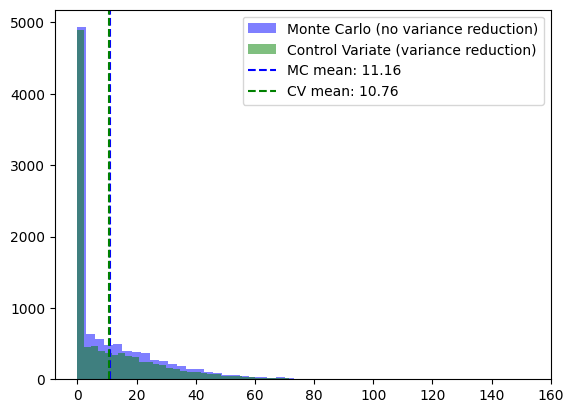

In [13]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# ブラックショールズ方程式
def black_scholes_call(S0, K, r, T, sigma):
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    C = S0 * stats.norm.cdf(d1) - K * np.exp(-r * T) * stats.norm.cdf(d2)
    return C

# モンテカルロシミュレーションによるオプション価格計算
def monte_carlo_call(S0, K, r, T, sigma, num_simulations):
    np.random.seed(42)
    ST = S0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * np.random.normal(size=num_simulations))
    payoffs = np.maximum(ST - K, 0)  # コールオプションのペイオフ
    return np.exp(-r * T) * np.mean(payoffs)  # 割引後の平均ペイオフ

# 分散削減法（コントロール変数法）の適用
def control_variate_monte_carlo_call(S0, K, r, T, sigma, num_simulations):
    np.random.seed(42)
    
    # コントロール変数としてブラックショールズ理論価格を使う
    C_theoretical = black_scholes_call(S0, K, r, T, sigma)
    
    # 最終株価のシミュレーション
    ST = S0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * np.random.normal(size=num_simulations))
    payoffs = np.maximum(ST - K, 0)
    
    # コントロール変数の調整
    control_variate = np.exp(-r * T) * np.mean(payoffs) - C_theoretical
    return C_theoretical + control_variate

# パラメータ設定
S0 = 100    # 現在の株価
K = 100     # 行使価格
r = 0.05    # リスクフリーレート
T = 1       # 残存期間（1年）
sigma = 0.2 # ボラティリティ
num_simulations = 10000  # シミュレーションの回数

# ブラックショールズ理論価格
C_bs = black_scholes_call(S0, K, r, T, sigma)
print(f"ブラックショールズによる理論価格: {C_bs:.2f}")

# モンテカルロシミュレーション
C_mc = monte_carlo_call(S0, K, r, T, sigma, num_simulations)
print(f"モンテカルロシミュレーションによるオプション価格: {C_mc:.2f}")

# 分散削減法（コントロール変数法）
C_cv = control_variate_monte_carlo_call(S0, K, r, T, sigma, num_simulations)
print(f"分散削減法（コントロール変数法）によるオプション価格: {C_cv:.2f}")

# 結果の比較
print(f"ブラックショールズ理論価格とモンテカルロの差: {C_bs - C_mc:.2f}")
print(f"ブラックショールズ理論価格と分散削減法の差: {C_bs - C_cv:.2f}")

# 結果の可視化（オプション価格の分布）
payoffs_mc = np.maximum(S0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * np.random.normal(size=num_simulations)) - K, 0)
payoffs_cv = np.maximum(S0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * np.random.normal(size=num_simulations)) - K, 0)

plt.hist(payoffs_mc, bins=50, alpha=0.5, label='Monte Carlo (no variance reduction)', color='blue')
plt.hist(payoffs_cv, bins=50, alpha=0.5, label='Control Variate (variance reduction)', color='green')
plt.axvline(x=np.mean(payoffs_mc), color='blue', linestyle='dashed', label=f'MC mean: {np.mean(payoffs_mc):.2f}')
plt.axvline(x=np.mean(payoffs_cv), color='green', linestyle='dashed', label=f'CV mean: {np.mean(payoffs_cv):.2f}')
plt.legend()
plt.show()


分散削減法の結果が「良い」かどうかを評価する際の基準は、主に次の点を考慮します：

1. 分散の削減

分散削減法の主な目的は、シミュレーション結果の分散を小さくすることです。分散が小さければ、シミュレーション結果がより安定し、予測精度が高くなります。

- 理想的な結果: 分散が元のシミュレーションと比べて大幅に減少していれば、その分散削減法は効果的であるといえます。たとえば、元の分散が1000だったのに対して、分散削減法を適用後に100以下に減少した場合、それは非常に成功した結果です。
- 不十分な結果: 分散削減法を適用しても、分散があまり減少しない場合は、その手法が適切でないか、適切なパラメータ設定がされていない可能性があります。

2. 計算精度

分散削減法を適用した後に得られる平均値や期待値の推定が、理論的に期待される値にどれくらい近いかも重要です。

- 理想的な結果: 得られた推定値（平均値や期待値）が理論的な期待値や実際の値と非常に近い場合、それは非常に精度の高いシミュレーション結果です。
  - 例: 実際の理論的期待値が100であり、シミュレーション結果が99.8や100.1であれば、このシミュレーションは精度が高いと判断できます。
- 不十分な結果: 推定値が理論的期待値から大きく外れている場合、そのシミュレーションは誤差が大きいと言えます。

3. 計算コストの低減

分散削減法が成功すると、シミュレーションの計算コスト（サンプル数や実行時間）が低減することが期待されます。特に、同じ精度を保ちながら、より少ないサンプル数で結果を得られる場合、その手法は効率的であると言えます。

- 理想的な結果: サンプル数を減らしても、結果の精度が維持されるか、さらに向上する場合。そのため、計算時間やメモリ消費が削減され、より効率的に結果が得られる。
- 不十分な結果: サンプル数を減らしても結果の精度が低下する場合や、分散削減法を使っても計算時間が大幅に増加する場合。

4. サンプル数に対する収束の速さ

分散削減法を使うことで、少ないサンプル数でより良い結果が得られることが理想です。収束速度が速い場合、シミュレーションを繰り返す回数が少なくて済むため、効率的です。

- 理想的な結果: 少ないサンプルで結果が早く収束し、期待される精度が得られる。
- 不十分な結果: サンプル数が多くないと十分に収束せず、精度が悪化する場合。

## 分散が減少しているか？

In [ ]:
var_mc = np.var(payoffs_mc)
var_cv = np.var(payoffs_cv)
print(f"モンテカルロシミュレーションの分散: {var_mc:.2f}")
print(f"分散削減法（コントロール変数法）の分散: {var_cv:.2f}")


モンテカルロシミュレーションの分散: 244.92
分散削減法（コントロール変数法）の分散: 230.22


## 期待値が理論値に近いか？

In [15]:
print(f"ブラックショールズ理論価格: {C_bs:.2f}")
print(f"モンテカルロシミュレーションによるオプション価格: {C_mc:.2f}")
print(f"分散削減法（コントロール変数法）によるオプション価格: {C_cv:.2f}")


ブラックショールズ理論価格: 10.45
モンテカルロシミュレーションによるオプション価格: 10.45
分散削減法（コントロール変数法）によるオプション価格: 10.45


## 計算コストが削減され、計算効率が向上しているか？

In [17]:
import time

# モンテカルロシミュレーションの計算時間
start_time = time.time()
C_mc = monte_carlo_call(S0, K, r, T, sigma, num_simulations)
end_time = time.time()
mc_time = end_time - start_time

# 分散削減法の計算時間
start_time = time.time()
C_cv = control_variate_monte_carlo_call(S0, K, r, T, sigma, num_simulations)
end_time = time.time()
cv_time = end_time - start_time

print(f"モンテカルロシミュレーションの計算時間: {mc_time:.4f}秒")
print(f"分散削減法（コントロール変数法）の計算時間: {cv_time:.4f}秒")


モンテカルロシミュレーションの計算時間: 0.0000秒
分散削減法（コントロール変数法）の計算時間: 0.0194秒


## サンプル数が少なくても精度が保たれ、収束が速いか？

In [18]:
num_simulations_small = 1000

# モンテカルロシミュレーション（サンプル数1000）
C_mc_small = monte_carlo_call(S0, K, r, T, sigma, num_simulations_small)
print(f"モンテカルロシミュレーション（サンプル数1000）: {C_mc_small:.2f}")

# 分散削減法（コントロール変数法）（サンプル数1000）
C_cv_small = control_variate_monte_carlo_call(S0, K, r, T, sigma, num_simulations_small)
print(f"分散削減法（サンプル数1000）: {C_cv_small:.2f}")


モンテカルロシミュレーション（サンプル数1000）: 10.52
分散削減法（サンプル数1000）: 10.52
